# **Hotel booking**

## Loading Cleaned dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

In [2]:
clean_path = os.path.join("..", "Data", "clean_folder", "hotel_booking_clean.csv")
import os
BASE_DIR = os.path.dirname(os.path.dirname(os.getcwd()))
CHART_DIR = os.path.join(BASE_DIR, "output", "charts")
os.makedirs(CHART_DIR, exist_ok=True)

df = pd.read_csv(clean_path)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,Unknown,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,Unknown,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,Unknown,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,Unknown,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,Unknown,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Comparison of Resort Hotel vs City Hotel bookings

In [3]:
# converting date columns to datetime format
df['arrival_date_year'] = pd.to_datetime(df['arrival_date_year'], format='%Y')
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])


#### To visualize the room nights production for both city hotels and resort hotels we will need to group all the stay nights for each hotel by their weekend stay and week stays column(category).

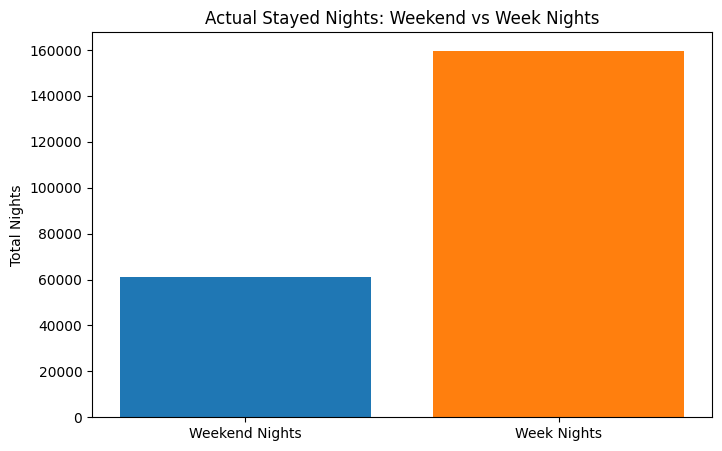

In [4]:
# Monthly grouping for both hotels

# first we take to consideration that some of the bookings didn't stay any nights so we filter those out by making sure the reservation status is 'Check-Out'
df_stayed = df[df['reservation_status'] == 'Check-Out']

# Group by month and hotel type
hotel_weekend = df_stayed.groupby('hotel')['stays_in_weekend_nights'].sum()
hotel_week = df_stayed.groupby('hotel')['stays_in_week_nights'].sum()


weekend_total = df_stayed['stays_in_weekend_nights'].sum()
week_total = df_stayed['stays_in_week_nights'].sum()

# Plotting the results
plt.figure(figsize=(8,5))
plt.bar(['Weekend Nights', 'Week Nights'], [weekend_total, week_total], color=['#1f77b4', '#ff7f0e'])

# Adding labels and title
plt.title("Actual Stayed Nights: Weekend vs Week Nights")
plt.ylabel("Total Nights")
plt.show()



As the figure illustrates, week‑night stays consistently generate more total room nights than weekend stays, highlighting a stronger demand for mid‑week occupancy across the dataset.

#### Comparisons and illustration of room night production for both hotels

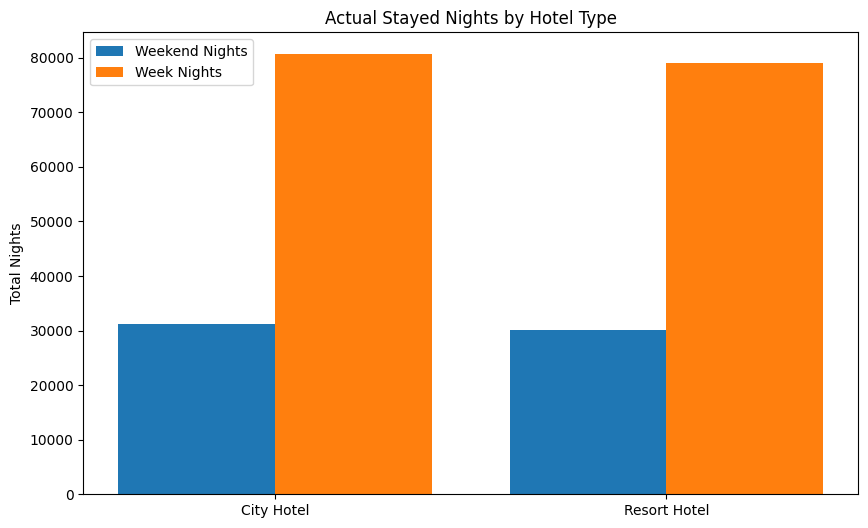

In [5]:
#sum weekend nights by hotel type
hotel_weekend = df_stayed.groupby('hotel')['stays_in_weekend_nights'].sum()
hotel_week = df_stayed.groupby('hotel')['stays_in_week_nights'].sum()

x = range(len(hotel_weekend))

plt.figure(figsize=(10,6))

plt.bar(x, hotel_weekend, width=0.4, label='Weekend Nights', color='#1f77b4')
plt.bar([i + 0.4 for i in x], hotel_week, width=0.4, label='Week Nights', color='#ff7f0e')

# Position x‑axis labels centered between the two bars in each hotel group
plt.xticks([i + 0.2 for i in x], hotel_weekend.index)


# Adding labels and title
plt.title("Actual Stayed Nights by Hotel Type")
plt.ylabel("Total Nights")
plt.legend()
plt.show()


The chart suggests that City and Resort hotels experience nearly identical stay patterns, with both attracting a similar balance of week‑night and weekend‑night guests.

In [6]:
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015-01-01,July,27,1,0,0,2,...,No Deposit,0.0,Unknown,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015-01-01,July,27,1,0,0,2,...,No Deposit,0.0,Unknown,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015-01-01,July,27,1,0,1,1,...,No Deposit,0.0,Unknown,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015-01-01,July,27,1,0,1,1,...,No Deposit,304.0,Unknown,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015-01-01,July,27,1,0,2,2,...,No Deposit,240.0,Unknown,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Monthly stay trend by hotel type using seaborn
Our goal is to visualize how room‑night production evolves month by month for both hotel types. Using Seaborn allows us to compare their seasonal patterns side‑by‑side and identify periods of stronger or weaker demand throughout the year.

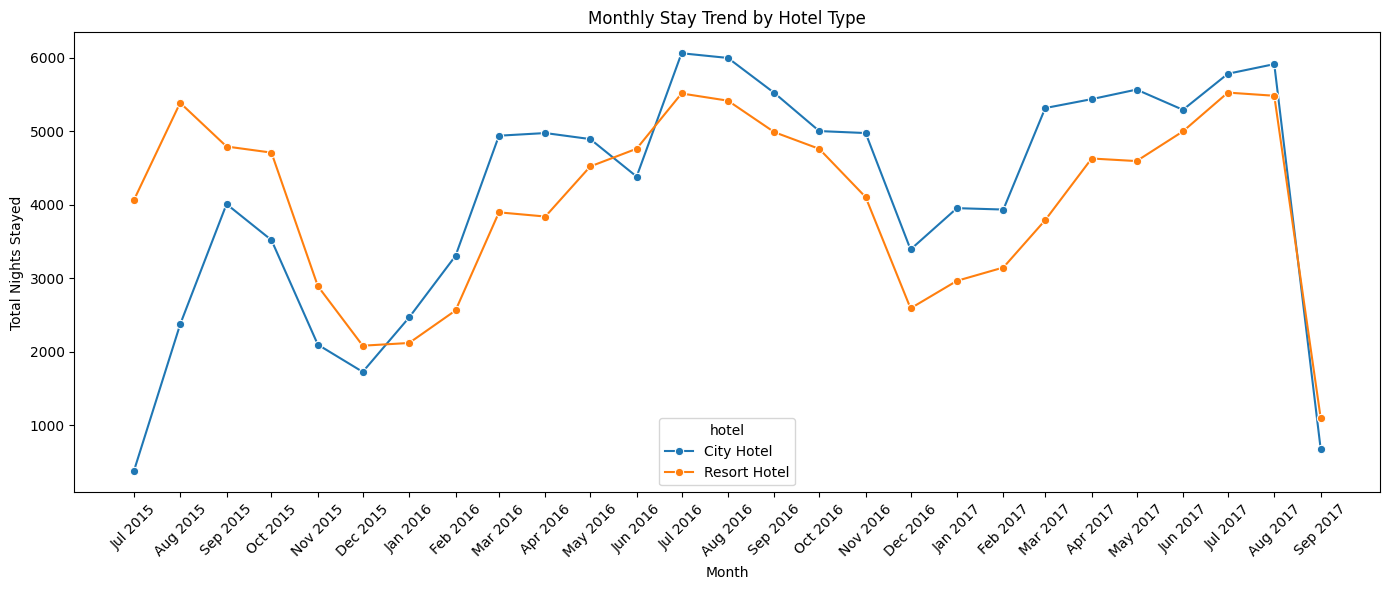

In [7]:


# Filter only actual stays (no cancellations, no-shows)
df_stayed = df[df['reservation_status'] == 'Check-Out'].copy()

# Create a proper monthly timestamp column
df_stayed['month'] = (
    df_stayed['reservation_status_date']
    .dt.to_period('M')
    .dt.to_timestamp()
)

# Calculate total nights stayed (week + weekend)
df_stayed['total_nights'] = (
    df_stayed['stays_in_weekend_nights'] +
    df_stayed['stays_in_week_nights']
)

# Group by month and hotel
monthly_hotel = (
    df_stayed.groupby(['month', 'hotel'])['total_nights']
    .sum()
    .reset_index()
)

# Plot with Seaborn
plt.figure(figsize=(14,6))
sns.lineplot(
    data=monthly_hotel,
    x='month',
    y='total_nights',
    hue='hotel',
    marker='o'
)

plt.title("Monthly Stay Trend by Hotel Type")
plt.xlabel("Month")
plt.ylabel("Total Nights Stayed")

# Force every month label to appear
months = monthly_hotel['month'].unique()

plt.xticks(
    ticks=months,
    labels=pd.to_datetime(months).strftime('%b %Y'),
    rotation=45
)

plt.tight_layout()
plt.show()



The overall trend shows that both hotels follow a similar seasonal pattern. Demand builds gradually from January, peaks around September, and then drops off toward December.
When comparing the two, Resort Hotels had higher room night production from July to December 2015. But after that, City Hotels took the lead and consistently produced more room nights than Resort Hotels.

### Distribution Channel
Now we want to take a look at which distribution channel brought in the most bookings — whether that’s Travel Agents, Direct, Corporate, GDS, or Unknown. We’ll use a Plotly pie chart for this because it clearly shows the share each channel contributes and it’s interactive, which makes exploring the data much easier.

In [8]:
fig = px.pie(
    df,
    names='distribution_channel',
    title='Distribution Channel Share'
)
os.makedirs("../output/charts", exist_ok=True)
fig.write_image(os.path.join(CHART_DIR, "distribution_channel_share.png"))

fig.show()


The pie chart gives us a clear picture of how bookings are distributed across different channels. It’s immediately obvious that TA/TO (Travel Agents/Tour Operators) dominate the scene, accounting for over 79% of all bookings. Direct bookings come in second at around 15%, followed by Corporate with just under 6%. GDS and Undefined barely register, making up a tiny fraction of the total.

This tells us that most guests are coming through third-party intermediaries rather than booking directly or through corporate deals.

To increase the bottom line and reduce the commission paid to TA/TO our marketing strategy should focus on promoting more direct or corporate bookings.

## Average Daily Rate by market segment


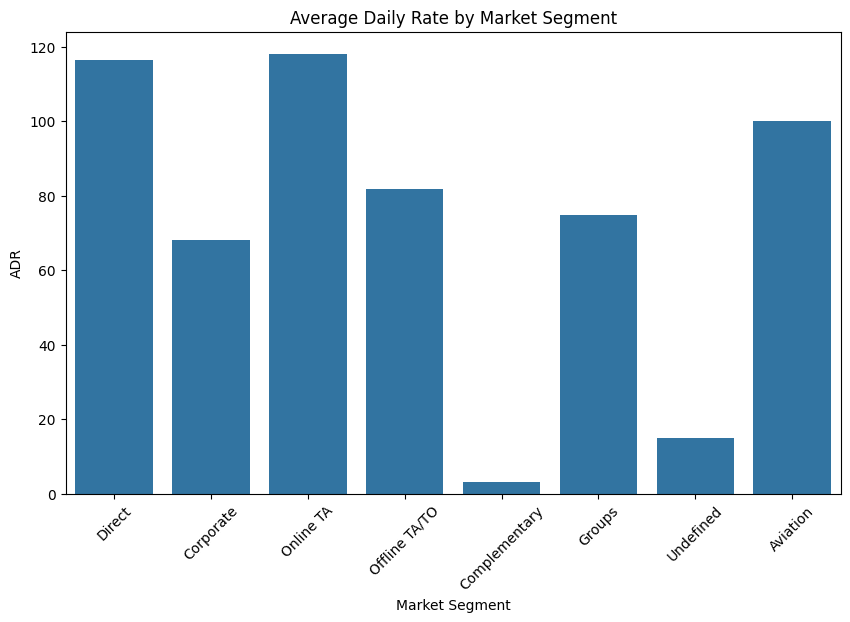

In [30]:


plt.figure(figsize=(10,6))
sns.barplot(data=df, x='market_segment', y='adr', estimator='mean', errorbar=None)
plt.title('Average Daily Rate by Market Segment')
plt.xticks(rotation=45)
plt.ylabel('ADR')
plt.xlabel('Market Segment')
plt.show()


### Revenue Analysis

In [9]:
# total nights for every booking in the full dataset
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# Estimate revenue per booking (ADR × total nights)
df['revenue'] = df['adr'] * df['total_nights']
df_stayed = df[df['reservation_status'] == 'Check-Out'].copy()

# Recalculate total nights for the filtered dataset
df_stayed['total_nights'] = df_stayed['stays_in_weekend_nights'] + df_stayed['stays_in_week_nights']
df_stayed['revenue'] = df_stayed['adr'] * df_stayed['total_nights']

# Extract the month from the reservation status date for monthly grouping
df_stayed['month'] = df_stayed['reservation_status_date'].dt.to_period('M').dt.to_timestamp()

# Aggregate total monthly revenue for each hotel type
monthly_hotel_revenue = df_stayed.groupby(['month', 'hotel'])['revenue'].sum().reset_index()

# Plot monthly revenue trends for both hotel types using Plotly
fig = px.line(
    monthly_hotel_revenue,
    x='month',
    y='revenue',
    color='hotel',
    title='Monthly Revenue Trend by Hotel Type'
)
fig.write_image(os.path.join(CHART_DIR, "monthly_revenue_trend.png"))

# Display the interactive chart
fig.show()


Even though Resort Hotels hit higher revenue peaks during the summer months compared to City Hotels, their performance shows a steep drop afterward followed by a slow recovery. On the other hand, City Hotels show a more stable and consistent revenue trend, with fluctuations that feel more controlled and less extreme than the Resort Hotel. This suggests that Resort Hotels are more dependent on seasonal tourism, while City Hotels benefit from steadier demand throughout the year.

### Total Revenue by Hotel Type

In [10]:
# Filtering the dataset to include only completed stays 
df_stayed = df[df['reservation_status'] == 'Check-Out'].copy()

# Calculate the total number of nights stayed per booking
df_stayed['total_nights'] = (
    df_stayed['stays_in_weekend_nights'] +
    df_stayed['stays_in_week_nights']
)

# Estimate revenue per booking by multiplying ADR (average daily rate) by total nights
df_stayed['revenue'] = df_stayed['adr'] * df_stayed['total_nights']

# Aggregate total revenue by hotel type
total_revenue = df_stayed.groupby('hotel')['revenue'].sum().reset_index()

# Create a bar chart to compare total revenue between City and Resort hotels
fig = px.bar(
    total_revenue,
    x='hotel',
    y='revenue',
    text='revenue',
    title='Total Revenue Generated by Each Hotel Type'
)

# Adjust bar appearance: thinner bars and display revenue values on top
fig.update_traces(
    texttemplate='%{text:.2f}',  # Format revenue labels with two decimal places
    textposition='outside',      
    width=0.2                   
)

# Customizing chart layout
fig.update_layout(
    width=800,
    height=500,
    yaxis_title='Total Revenue',
    xaxis_title='Hotel Type'
)
fig.write_image(os.path.join(CHART_DIR, "revenue_trend.png"))

fig.show()


As expected, City Hotels generated more revenue overall, bringing in about $12.1M, compared to $10.8M from Resort Hotels over the same period. The difference isn’t massive, but it does show that City Hotels were the stronger performer in total revenue.

## Conclusion
The analysis of over 10,000 hotel bookings across City Hotel and Resort Hotel reveals distinct patterns in performance, guest behaviour, and revenue drivers. By examining ADR, occupancy, cancellations, booking channels, and seasonal trends, we’ve uncovered insights that directly address the business requirements.

City Hotels consistently maintain higher occupancy rates, especially during business-heavy months, suggesting stronger year-round demand. Resort Hotels, on the other hand, achieve higher ADR during peak seasons, indicating strong pricing power during holidays and summer periods.

A key finding is the dominance of TA/TO channels, which drive a large share of bookings but also incur high commission costs. This reduces net profitability despite strong booking volume. Encouraging more direct or corporate bookings could significantly improve margins.
Seasonality plays a major role: Resort Hotels peak in summer, while City Hotels perform steadily year-round, requiring tailored pricing and staffing strategies.

Additionally, the ADR by Market Segment analysis reveals that:

Online TA and Direct bookings yield the highest ADR, both approaching £120.

Aviation bookings also show strong ADR, around £100.

Complementary bookings generate the lowest ADR, below £10, offering minimal revenue contribution.

Corporate and Offline TA/TO segments fall in the mid-to-low range, suggesting potential for pricing optimization.

This segmentation insight reinforces the importance of channel strategy: not all bookings contribute equally to revenue, and high-volume channels may dilute profitability if ADR is low or commissions are high.

Overall, City Hotels deliver consistent occupancy, while Resort Hotels excel in high-ADR seasonal windows. Profitability is shaped not just by volume, but by channel mix, guest behavior, and pricing strategy. Targeted interventions — such as shifting demand toward higher-yield segments and optimizing seasonal pricing — can significantly enhance performance across both hotel types.